In [614]:
import pickle
import pandas as pd
from sklearn import tree

model = pickle.load(open("data/temp_density_tree.model.sav", "rb"))
features = (
    pd.read_csv("data/density_train.csv", sep=";", decimal=",")
    .drop(["T"], axis=1)
    .columns.values.tolist()
)

rules = tree.export_text(model, feature_names=features)
print(rules)

|--- Density <= 1.04
|   |--- Density <= 1.03
|   |   |--- value: [70.00]
|   |--- Density >  1.03
|   |   |--- Density <= 1.04
|   |   |   |--- value: [65.00]
|   |   |--- Density >  1.04
|   |   |   |--- value: [60.00]
|--- Density >  1.04
|   |--- Density <= 1.07
|   |   |--- TiO2 <= 0.03
|   |   |   |--- Al2O3 <= 0.03
|   |   |   |   |--- Density <= 1.05
|   |   |   |   |   |--- Density <= 1.05
|   |   |   |   |   |   |--- value: [50.00]
|   |   |   |   |   |--- Density >  1.05
|   |   |   |   |   |   |--- value: [42.50]
|   |   |   |   |--- Density >  1.05
|   |   |   |   |   |--- Density <= 1.06
|   |   |   |   |   |   |--- value: [35.00]
|   |   |   |   |   |--- Density >  1.06
|   |   |   |   |   |   |--- value: [22.50]
|   |   |   |--- Al2O3 >  0.03
|   |   |   |   |--- Density <= 1.06
|   |   |   |   |   |--- Density <= 1.05
|   |   |   |   |   |   |--- value: [70.00]
|   |   |   |   |   |--- Density >  1.05
|   |   |   |   |   |   |--- value: [65.00]
|   |   |   |   |--- Den

In [615]:
from src.rules import get_rules


rules = get_rules(model, features)
display(len(rules))
rules

27

[if (Density > 1.042) and (Density > 1.069) and (Density <= 1.118) and (Density > 1.083) and (Density > 1.086) and (Al2O3 > 0.025) -> 20.0,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) and (Density > 1.053) and (Density > 1.057) -> 22.5,
 if (Density <= 1.042) and (Density > 1.033) and (Density > 1.037) -> 60.0,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) and (Density <= 1.053) and (Density <= 1.046) -> 50.0,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) and (Density <= 1.053) and (Density > 1.046) -> 42.5,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) and (Density > 1.053) and (Density <= 1.057) -> 35.0,
 if (Density <= 1.042) and (Density > 1.033) and (Density <= 1.037) -> 65.0,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 > 0.025) and (Density <= 1.061) and (Density <= 1.055) -> 70.0,
 if (De

In [616]:
from src.rules import normalise_rules


rules = normalise_rules(rules)
display(len(rules))
rules

27

[if (Density > 1.042) and (Density <= 1.118) and (Al2O3 > 0.025) -> 20.0,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) -> 22.5,
 if (Density <= 1.042) and (Density > 1.033) -> 60.0,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) -> 50.0,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) -> 42.5,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) -> 35.0,
 if (Density <= 1.042) and (Density > 1.033) -> 65.0,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 > 0.025) -> 70.0,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 > 0.025) -> 65.0,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 > 0.025) -> 55.0,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 > 0.025) -> 50.0,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 > 0.025

In [617]:
from src.rules import delete_same_rules


rules = delete_same_rules(rules)
display(len(rules))
rules

15

[if (Density > 1.042) and (Density <= 1.118) and (Al2O3 > 0.025) -> 20.0,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) -> 37.5,
 if (Density <= 1.042) and (Density > 1.033) -> 62.5,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 > 0.025) -> 60.0,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 > 0.025) -> 65.0,
 if (Density > 1.042) and (Density <= 1.118) -> 37.5,
 if (Density > 1.042) and (Density <= 1.118) and (Al2O3 <= 0.025) -> 22.5,
 if (Density <= 1.042) -> 70.0,
 if (Density > 1.042) and (Density <= 1.179) -> 70.0,
 if (Density > 1.042) and (Density <= 1.179) and (Al2O3 <= 0.15) -> 65.0,
 if (Density > 1.042) and (Density <= 1.179) and (Al2O3 > 0.15) -> 50.0,
 if (Density > 1.042) and (Density <= 1.203) and (Al2O3 <= 0.15) -> 50.0,
 if (Density > 1.042) and (Al2O3 <= 0.15) -> 30.0,
 if (Density > 1.042) and (Density <= 1.182) and (Al2O3 > 0.15) -> 30.0,
 if (Density > 1.042) and (Al2O3 > 0.15) -> 22.5]

In [618]:
train = pd.read_csv("data/density_train.csv", sep=";", decimal=",")
test = pd.read_csv("data/density_test.csv", sep=";", decimal=",")

train["Density"] = train["Density"]
test["Density"] = test["Density"]

display(train.head(3))
display(test.head(3))
train.describe().transpose()

T  Al2O3  TiO2  Density
0  20    0.0   0.0  1.06250
1  25    0.0   0.0  1.05979
2  35    0.0   0.0  1.05404

T  Al2O3  TiO2  Density
0  30   0.00   0.0  1.05696
1  55   0.00   0.0  1.04158
2  25   0.05   0.0  1.08438

count       mean        std       min       25%        50%  \
T         38.0  45.526316  16.513282  20.00000  31.25000  45.000000   
Al2O3     38.0   0.078947   0.126080   0.00000   0.00000   0.000000   
TiO2      38.0   0.057895   0.108133   0.00000   0.00000   0.000000   
Density   38.0   1.108180   0.060772   1.03182   1.05763   1.082755   

               75%      max  
T        60.000000  70.0000  
Al2O3     0.050000   0.3000  
TiO2      0.050000   0.3000  
Density   1.169058   1.2186

In [619]:
from src.rules import simplify_rules

rules = simplify_rules(train, rules)
display(len(rules))
rules

15

[if (Density = 1.08) and (Al2O3 = 0.3) -> 20.0,
 if (Density = 1.055) and (TiO2 = 0.0) and (Al2O3 = 0.0) -> 37.5,
 if (Density = 1.037) -> 62.5,
 if (Density = 1.055) and (TiO2 = 0.0) and (Al2O3 = 0.3) -> 60.0,
 if (Density = 1.055) and (TiO2 = 0.3) -> 65.0,
 if (Density = 1.08) -> 37.5,
 if (Density = 1.08) and (Al2O3 = 0.0) -> 22.5,
 if (Density = 1.032) -> 70.0,
 if (Density = 1.11) -> 70.0,
 if (Density = 1.11) and (Al2O3 = 0.0) -> 65.0,
 if (Density = 1.11) and (Al2O3 = 0.3) -> 50.0,
 if (Density = 1.122) and (Al2O3 = 0.0) -> 50.0,
 if (Density = 1.219) and (Al2O3 = 0.0) -> 30.0,
 if (Density = 1.112) and (Al2O3 = 0.3) -> 30.0,
 if (Density = 1.219) and (Al2O3 = 0.3) -> 22.5]

/Users/user/Projects/python/fuzzy-rules-generator/.venv/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


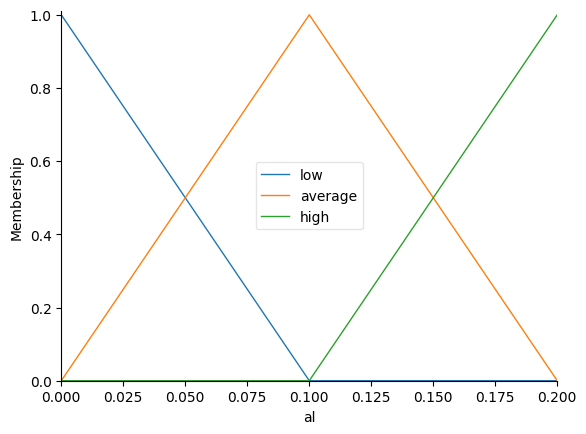

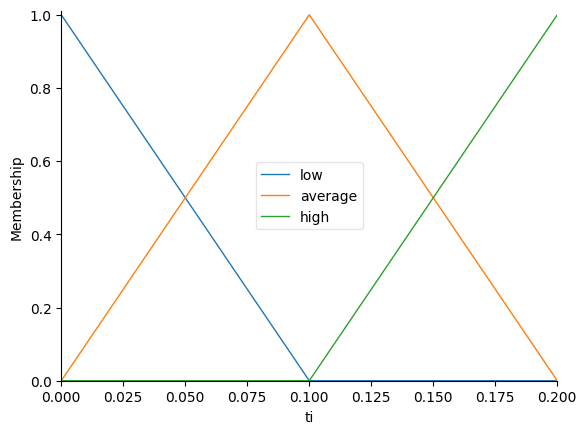

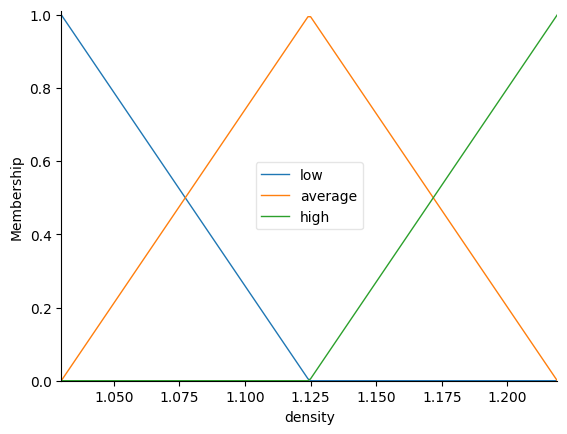

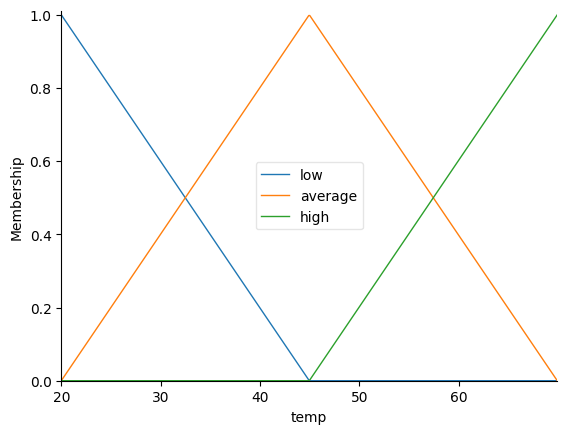

In [620]:
import numpy as np
from skfuzzy import control as ctrl
import skfuzzy as fuzz

al = ctrl.Antecedent(np.arange(0, 0.3, 0.1), "al")
ti = ctrl.Antecedent(np.arange(0, 0.3, 0.1), "ti")
density = ctrl.Antecedent(np.arange(1.03, 1.22, 0.001), "density")
# temp = ctrl.Consequent(train["T"].sort_values().unique(), "temp")
temp = ctrl.Consequent(np.arange(20, 70, 0.1), "temp")

al.automf(3, variable_type="quant")
al.view()
ti.automf(3, variable_type="quant")
ti.view()
density.automf(3, variable_type="quant")
density.view()
temp.automf(3, variable_type="quant")
temp.view()

In [621]:
from src.rules import get_fuzzy_rules

fuzzy_variables = {"Al2O3": al, "TiO2": ti, "Density": density, "consequent": temp}
fuzzy_rules = get_fuzzy_rules(rules, fuzzy_variables)
fuzzy_rules.remove(fuzzy_rules[5])

fuzzy_cntrl = ctrl.ControlSystem(fuzzy_rules)

sim = ctrl.ControlSystemSimulation(fuzzy_cntrl, lenient=False)

display(len(fuzzy_rules))
fuzzy_rules

8

[IF density[average] AND al[high] THEN temp[low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (density[low] AND ti[low]) AND al[low] THEN temp[average]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (density[low] AND ti[low]) AND al[high] THEN temp[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF density[low] AND ti[high] THEN temp[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF density[average] THEN temp[average]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF density[low] THEN temp[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF density[high] AND al[low] THEN temp[low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF density[high] AND al[high] THEN temp[low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax]

 Antecedents 
Antecedent: density                 = 1.0569013636039
  - low                             : 0.7153294856729852
  - average                         : 0.28467051432701485
  - high                            : 0.0
Antecedent: al                      = 0.0
  - low                             : 1.0
  - average                         : 0.0
  - high                            : 0.0
Antecedent: ti                      = 0.0
  - low                             : 1.0
  - average                         : 0.0
  - high                            : 0.0

 Rules 
RULE #0:
  IF density[average] AND al[high] THEN temp[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - density[average]                                       : 0.28467051432701485
  - al[high]                                               : 0.0
                             density[average] AND al[high] = 0.0
  Activation (THEN-clause):
                                      

np.float64(48.74543038303159)

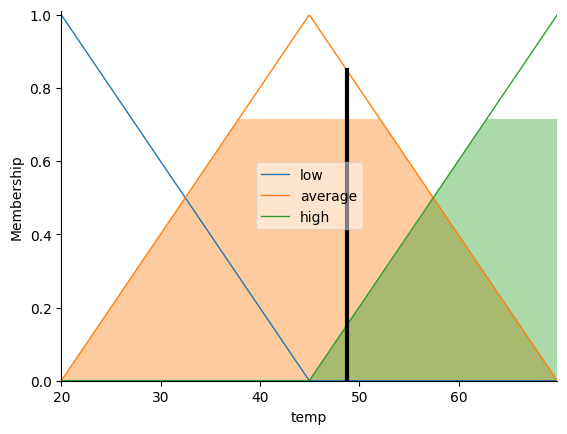

In [622]:
sim.input["al"] = 0.0
sim.input["ti"] = 0.0
sim.input["density"] = 1.0569013636039
sim.compute()
sim.print_state()
display(sim.output["temp"])
temp.view(sim=sim)

In [623]:
from sklearn import metrics
import math


def fuzzy_pred(row):
    sim.input["al"] = row["Al2O3"]
    sim.input["ti"] = row["TiO2"]
    sim.input["density"] = row["Density"]
    sim.compute()
    return sim.output["temp"]


def rmse(row):
    return math.sqrt(metrics.mean_squared_error([row["Real"]], [row["Inferred"]]))


result_train = train.copy()
result_train["Real"] = result_train["T"]
result_train["Inferred"] = result_train.apply(fuzzy_pred, axis=1)
result_train["RMSE"] = result_train.apply(rmse, axis=1)
result_train = result_train.round({"RMSE": 3})
result_train.head(15)

T  Al2O3  TiO2  Density  Real   Inferred    RMSE
0   20   0.00   0.0  1.06250    20  48.578230  28.578
1   25   0.00   0.0  1.05979    25  48.663659  23.664
2   35   0.00   0.0  1.05404    35  48.817616  13.818
3   40   0.00   0.0  1.05103    40  48.884597   8.885
4   45   0.00   0.0  1.04794    45  48.944177   3.944
5   50   0.00   0.0  1.04477    50  48.995860   1.004
6   60   0.00   0.0  1.03826    60  49.072119  10.928
7   65   0.00   0.0  1.03484    65  49.095671  15.904
8   70   0.00   0.0  1.03182    70  49.106525  20.893
9   20   0.05   0.0  1.08755    20  46.745977  26.746
10  45   0.05   0.0  1.07105    45  48.466565   3.467
11  50   0.05   0.0  1.06760    50  48.734477   1.266
12  55   0.05   0.0  1.06409    55  48.982062   6.018
13  65   0.05   0.0  1.05691    65  49.413311  15.587
14  70   0.05   0.0  1.05291    70  49.610931  20.389

In [624]:
result_test = test.copy()
result_test["Real"] = result_test["T"]
result_test["Inferred"] = result_test.apply(fuzzy_pred, axis=1)
result_test["RMSE"] = result_test.apply(rmse, axis=1)
result_test = result_test.round({"RMSE": 3})
result_test

T  Al2O3  TiO2  Density  Real   Inferred    RMSE
0   30   0.00  0.00  1.05696    30  48.743861  18.744
1   55   0.00  0.00  1.04158    55  49.038283   5.962
2   25   0.05  0.00  1.08438    25  47.071528  22.072
3   30   0.05  0.00  1.08112    30  47.438791  17.439
4   35   0.05  0.00  1.07781    35  47.847389  12.847
5   40   0.05  0.00  1.07446    40  48.176765   8.177
6   60   0.05  0.00  1.06053    60  49.208303  10.792
7   35   0.30  0.00  1.17459    35  41.592699   6.593
8   65   0.30  0.00  1.14812    65  41.072496  23.928
9   45   0.00  0.05  1.07424    45  48.196237   3.196
10  50   0.00  0.05  1.07075    50  48.490854   1.509
11  55   0.00  0.05  1.06721    55  48.763213   6.237
12  20   0.00  0.30  1.22417    20  28.316733   8.317
13  30   0.00  0.30  1.21310    30  31.499486   1.499
14  40   0.00  0.30  1.20265    40  35.558869   4.441
15  60   0.00  0.30  1.18265    60  40.318361  19.682
16  70   0.00  0.30  1.17261    70  41.865677  28.134

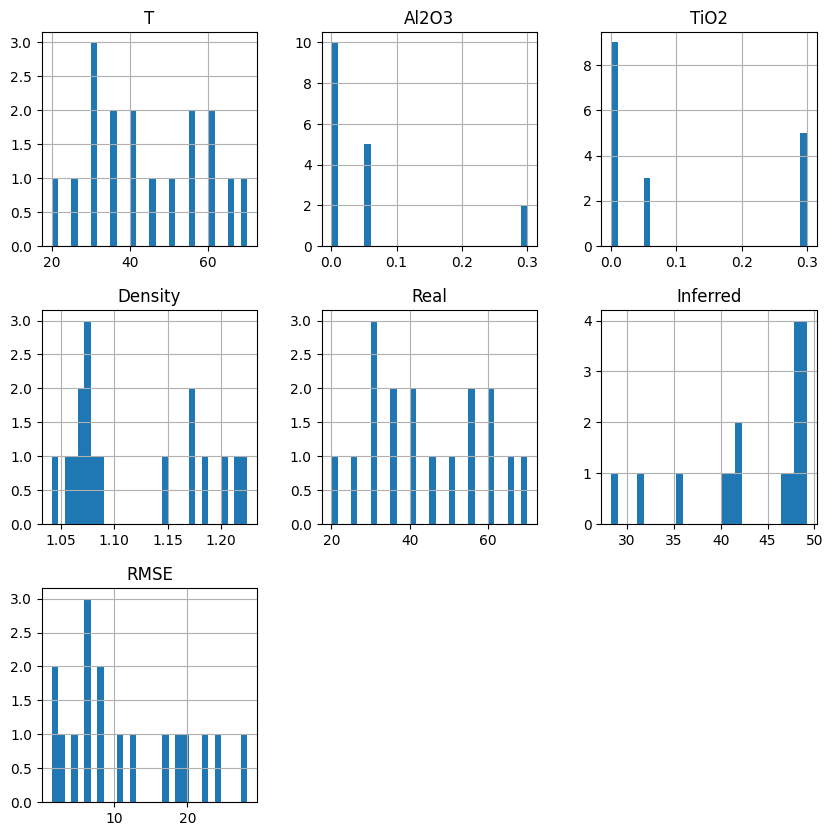

In [625]:
import matplotlib.pyplot as plt

result_test.hist(bins=30, figsize=(10, 10))
plt.show()

In [626]:
rmetrics = {}
rmetrics["RMSE_train"] = math.sqrt(
    metrics.mean_squared_error(result_train["Real"], result_train["Inferred"])
)
rmetrics["RMSE_test"] = math.sqrt(
    metrics.mean_squared_error(result_test["Real"], result_test["Inferred"])
)
rmetrics["RMAE_test"] = math.sqrt(
    metrics.mean_absolute_error(result_test["Real"], result_test["Inferred"])
)
rmetrics["R2_test"] = metrics.r2_score(result_test["Real"], result_test["Inferred"])

rmetrics

{'RMSE_train': 15.877604526754098,
 'RMSE_test': 14.274496148500475,
 'RMAE_test': 3.4262604750793813,
 'R2_test': 0.04481754347384659}